In [57]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import time
rng = numpy.random

In [7]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [8]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [11]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [15]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [16]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [17]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.302414477 W= 0.514975 b= -1.10767
Epoch: 0100 cost= 0.276376009 W= 0.499192 b= -0.994127
Epoch: 0150 cost= 0.253343672 W= 0.484347 b= -0.887334
Epoch: 0200 cost= 0.232970878 W= 0.470385 b= -0.786893
Epoch: 0250 cost= 0.214950427 W= 0.457254 b= -0.692426
Epoch: 0300 cost= 0.199010730 W= 0.444903 b= -0.603576
Epoch: 0350 cost= 0.184911922 W= 0.433287 b= -0.520012
Epoch: 0400 cost= 0.172441199 W= 0.422362 b= -0.441418
Epoch: 0450 cost= 0.161410570 W= 0.412087 b= -0.367498
Epoch: 0500 cost= 0.151653945 W= 0.402423 b= -0.297974
Epoch: 0550 cost= 0.143024117 W= 0.393333 b= -0.232585
Epoch: 0600 cost= 0.135391116 W= 0.384784 b= -0.171085
Epoch: 0650 cost= 0.128639713 W= 0.376744 b= -0.113243
Epoch: 0700 cost= 0.122668199 W= 0.369182 b= -0.0588407
Epoch: 0750 cost= 0.117386483 W= 0.362069 b= -0.00767421
Epoch: 0800 cost= 0.112714894 W= 0.35538 b= 0.0404493
Epoch: 0850 cost= 0.108583093 W= 0.349088 b= 0.0857106
Epoch: 0900 cost= 0.104928650 W= 0.343171 b= 0.12828
Epoch: 0950

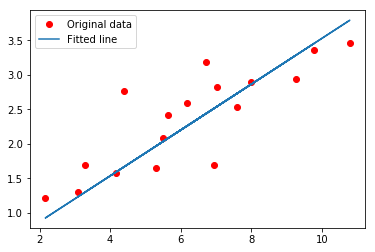

In [18]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), 
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [27]:
# code sinh viên cho câu a
def matrix_gen(m, n):
    return numpy.random.rand(m,n)

m, n, k=50, 40, 60
matrix_mn = matrix_gen(m, n)
matrix_nk = matrix_gen(n, k)

In [63]:
# code câu b của sinh viên
def py_matrix_mul(matrix_1, matrix_2):
    rows_m1 = len(matrix_1)
    cols_m1 = len(matrix_1[0])
    rows_m2 = len(matrix_2)
    cols_m2 = len(matrix_2[0])
    if cols_m1 != rows_m2:
        return None
    m3 = [[0 for row in range(cols_m2)] for col in range(rows_m1)]
    for i in range(rows_m1):
        for j in range(cols_m2):
            for k in range(cols_m1):
                m3[i][j] += matrix_1[i][k] * matrix_2[k][j]
    return m3
    
start_time = time.clock()
mt_mul_py1 = py_matrix_mul(matrix_mn, matrix_nk)
print (time.clock() - start_time, "seconds")


0.13781748827673823 seconds


In [68]:
# code câu c của sinh viên
start_time = time.clock()
mt_mul_numpy2 = np.matmul(matrix_mn,matrix_nk)
print (time.clock() - start_time, "seconds")

0.0002378765951789319 seconds


In [67]:
start_time = time.clock()
w1 = tf.constant(matrix_mn)
w2 = tf.constant(matrix_nk)
with tf.Session() as sess:
    print(tf.matmul(matrix_mn,matrix_nk))
print (time.clock() - start_time, "seconds")

Tensor("MatMul_5:0", shape=(50, 60), dtype=float64)
0.008358886954880518 seconds


In [126]:
def f(x):
    return x * 5 + 3

llen = 50
x = np.random.rand(llen)
y = f(x) + np.random.normal(0, 0.1, llen)
print('x', x)
print('y', y)
train_X = x
train_Y = y
n_samples = train_X.shape[0]
learning_rate = 1
training_epochs = 50
display_step = 5

x [ 0.31522772  0.61368883  0.13954083  0.89300772  0.56855962  0.72300427
  0.11959817  0.25952734  0.91599053  0.44837059  0.78303906  0.13325666
  0.22122209  0.74341903  0.1637487   0.11558313  0.88261803  0.57922697
  0.30518359  0.05209734  0.77837509  0.71070331  0.44783628  0.97009893
  0.68837332  0.13778467  0.65490783  0.60920905  0.0365873   0.0171856
  0.64967584  0.10455399  0.2852813   0.08680752  0.40147697  0.72786841
  0.38644425  0.70074364  0.61308373  0.66253318  0.17214177  0.41281984
  0.16500397  0.22020095  0.86041059  0.29194898  0.41534056  0.41007681
  0.58709624  0.55580201]
y [ 4.66470601  6.13696816  3.87515025  7.32107315  5.71304879  6.5906564
  3.46416844  4.31748112  7.60258861  5.29082336  6.84001843  3.73289324
  3.98317219  6.71164722  3.62945158  3.59310844  7.25327996  5.95017392
  4.46448259  3.37382866  6.86627134  6.5439882   5.2284017   7.88444693
  6.3687961   3.63128572  6.35450093  6.02996166  3.06279231  3.08049427
  6.19067232  3.5152133

In [127]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [128]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [129]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [130]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0005 cost= 0.279203266 W= 2.26415 b= 4.30974
Epoch: 0010 cost= 0.153042838 W= 2.98393 b= 3.97169
Epoch: 0015 cost= 0.084948368 W= 3.51113 b= 3.71991
Epoch: 0020 cost= 0.048171245 W= 3.89849 b= 3.53491
Epoch: 0025 cost= 0.028305490 W= 4.18312 b= 3.39897
Epoch: 0030 cost= 0.017572721 W= 4.39225 b= 3.29909
Epoch: 0035 cost= 0.011772797 W= 4.54592 b= 3.2257
Epoch: 0040 cost= 0.008637378 W= 4.65883 b= 3.17177
Epoch: 0045 cost= 0.006941710 W= 4.74178 b= 3.13215
Epoch: 0050 cost= 0.006023951 W= 4.80274 b= 3.10304
Optimization Finished!
Training cost= 0.00602395 W= 4.80274 b= 3.10304 



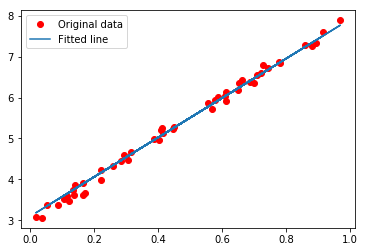

In [131]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), 
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()